<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/W10_14_4_23(Cifar10_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load Cifar10
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# One-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

In [5]:
# Tích chập 32 lần
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(32,32,3,), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

# Tích chập 64 lần
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

# ANN
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

In [6]:
model.save('/content/drive/MyDrive/Train model/cifar10_CNN.h5')

1/1 [==============================] - 0s 17ms/step


array([8])

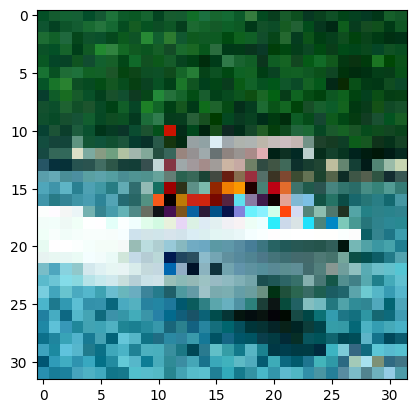

In [10]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img('/content/cano.jpg', target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
#img = img[:,:,0]
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)